Team's members' contribution:

- Tinh Ta: Cleaning and preprocess the data
- Quan Tran: Seeking appropriate dataset, cleaning and preprocess the data
- Nguyen Le Nguyen Khang: Visualizing data
- Nguyen Ngoc: Visualizing data
- Tran Dung: Visualizing data and preparing slides

# I. Data cleaning

##
Importing libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import country_converter as coco

In [7]:
medDoc = pd.read_csv('data\medicalDoctors.csv')
pharm = pd.read_csv('data\pharmacists.csv')
lifeExp = pd.read_csv('data\HALElifeExpectancyAtBirth.csv')

# Checking null values
print(medDoc.isnull().sum(), '\n')
print(pharm.isnull().sum(), '\n')
print(lifeExp.isnull().sum(), '\n')

Location         0
Period           0
Indicator        0
First Tooltip    0
dtype: int64 

Location         0
Period           0
Indicator        0
First Tooltip    0
dtype: int64 

Location         0
Period           0
Indicator        0
Dim1             0
First Tooltip    0
dtype: int64 



## 
Exploring the datasets

In [8]:
medDoc.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Medical doctors (per 10,000)",2.78
1,Afghanistan,2015,"Medical doctors (per 10,000)",2.85
2,Afghanistan,2014,"Medical doctors (per 10,000)",2.98
3,Afghanistan,2013,"Medical doctors (per 10,000)",2.85
4,Afghanistan,2012,"Medical doctors (per 10,000)",2.41


In [9]:
pharm.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2016,"Pharmacists (per 10,000)",0.47
1,Afghanistan,2015,"Pharmacists (per 10,000)",0.50
2,Afghanistan,2014,"Pharmacists (per 10,000)",0.51
3,Afghanistan,2012,"Pharmacists (per 10,000)",0.27
4,Afghanistan,2011,"Pharmacists (per 10,000)",0.28


In [10]:
lifeExp.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Both sexes,53.95
1,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Male,54.73
2,Afghanistan,2019,Healthy life expectancy (HALE) at birth (years),Female,53.15
3,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
4,Afghanistan,2015,Healthy life expectancy (HALE) at birth (years),Male,52.78


## 
Merging the files together

In [11]:
# Merge pharmacists and doctors dataframes on location and period
medProf = medDoc.merge(pharm, on=['Location', 'Period'], how='inner')
medProf['Total Density'] = medProf['First Tooltip_x'] + medProf['First Tooltip_y']

# Drop unnecessary columns
columns_to_drop = ['Indicator_x', 'Indicator_y']
medProf = medProf.drop(columns=columns_to_drop)

# Rename the columns
medProf = medProf.rename(columns={'First Tooltip_x': 'Pharmacists Density','First Tooltip_y': 'Doctors Density' })
medProf.head()
#medProf

,Location,Period,Pharmacists Density,Doctors Density,Total Density
0,Afghanistan,2016,2.78,0.47,3.25
1,Afghanistan,2015,2.85,0.50,3.35
2,Afghanistan,2014,2.98,0.51,3.49
3,Afghanistan,2012,2.41,0.27,2.68
4,Afghanistan,2011,2.52,0.28,2.80


In [12]:
# Inner join medProf and lifeExp dataframes
medProf_lifeExp = medProf.merge(lifeExp, on=['Location', 'Period'], how='inner')
medProf_lifeExp

,Location,Period,Pharmacists Density,Doctors Density,Total Density,Indicator,Dim1,First Tooltip
0,Afghanistan,2015,2.85,0.500,3.350,Healthy life expectancy (HALE) at birth (years),Both sexes,52.60
1,Afghanistan,2015,2.85,0.500,3.350,Healthy life expectancy (HALE) at birth (years),Male,52.78
2,Afghanistan,2015,2.85,0.500,3.350,Healthy life expectancy (HALE) at birth (years),Female,52.44
3,Afghanistan,2010,2.37,0.280,2.650,Healthy life expectancy (HALE) at birth (years),Both sexes,51.13
4,Afghanistan,2010,2.37,0.280,2.650,Healthy life expectancy (HALE) at birth (years),Male,51.51
...,...,...,...,...,...,...,...,...
658,Zimbabwe,2015,1.82,0.100,1.920,Healthy life expectancy (HALE) at birth (years),Male,49.62
659,Zimbabwe,2015,1.82,0.100,1.920,Healthy life expectancy (HALE) at birth (years),Female,52.59
660,Zimbabwe,2010,1.27,0.043,1.313,Healthy life expectancy (HALE) at birth (years),Both sexes,45.22
661,Zimbabwe,2010,1.27,0.043,1.313,Healthy life expectancy (HALE) at birth (years),Male,44.25


In [13]:
# Drop unnecessary columns
columns_to_drop = ['Indicator']
medProf_lifeExp = medProf_lifeExp.drop(columns=columns_to_drop)

# Rename the columns
medProf_lifeExp = medProf_lifeExp.rename(columns={'Dim1': 'Sex','First Tooltip': 'Years' })
medProf_lifeExp.head()
#medProf_lifeExp

,Location,Period,Pharmacists Density,Doctors Density,Total Density,Sex,Years
0,Afghanistan,2015,2.85,0.50,3.35,Both sexes,52.60
1,Afghanistan,2015,2.85,0.50,3.35,Male,52.78
2,Afghanistan,2015,2.85,0.50,3.35,Female,52.44
3,Afghanistan,2010,2.37,0.28,2.65,Both sexes,51.13
4,Afghanistan,2010,2.37,0.28,2.65,Male,51.51


##
We are also interested in coverting not only the differences in countries but also the differences between continents. Therefore we created a continent column based on the country of origin using country_converter library

In [14]:
def get_continent(country):
    try:
        return coco.CountryConverter().convert(country, to='continent')
    except ValueError:
        return None

# Assuming df is your DataFrame and it contains a column named 'country' with country names
medProf_lifeExp['Continent'] = medProf_lifeExp['Location'].apply(get_continent)


# check null values again after adding continent:
print(medProf_lifeExp.isnull().sum(), '\n')

Location               0
Period                 0
Pharmacists Density    0
Doctors Density        0
Total Density          0
Sex                    0
Years                  0
Continent              0
dtype: int64 



-------------

# II. Data analysis and visualization

## 1. Overview of Life expectancy (Period: 2000, 2010, 2015)

First, we will look at the average life expectancy in these 3 years:

In [15]:
# Group the data by year and show the mean life expectancy of each year:
medProf_lifeExp.groupby(by='Period')['Years'].mean()

Period
2000    63.514321
2010    63.821519
2015    64.954762
Name: Years, dtype: float64

**<u>Interpretation<u>:** As we can see, **there is an increase in average life expectancy over these years, with the highest average observed in 2015.** This trend might indicate potential improvements in healthcare, living conditions, and other factors that contribute to longer life expectancy over time. 
Our analysis in this report concentrates specifically on healthcare, examining the density of medical professionals, including doctors and pharmacists, per 10,000 individuals.

Next, we will have a closer look at  the average life expectancy (in years) along with the standard deviation for different periods (2000, 2010, and 2015) in each sex (female and male). 

In [16]:
# Group the data by year and sex and show the mean and standard deviation of life expectancy:
medProf_lifeExp.groupby(by=['Period', 'Sex']).agg({'Years': ['mean', 'std']})

Years          
                        mean       std
Period Sex                            
2000   Both sexes  63.507222  4.611257
       Female      65.391481  4.491888
       Male        61.644259  4.999522
2010   Both sexes  63.824556  6.787953
       Female      65.254222  6.871917
       Male        62.385778  6.853040
2015   Both sexes  64.962597  6.631334
       Female      66.109740  6.603435
       Male        63.791948  6.757679

**<u>Interpretation<u>:** **In general, females typically exhibit a higher average life expectancy compared to males.** The average life expectancy for females ranges from approximately 65 to 66 years, while for males, it falls between approximately 61 to 64 years. Over the years, both sexes have experienced an increase in average life expectancy.

Notably, the rising standard deviation in life expectancy across different time periods (increasing from aprroximately 4.61 years in 2000 to 6.63 years in 2015) indicates an increasing variability or diversity in life expectancy values within each gender group (females and males). This suggests that within each group, there is a wider range of health outcomes. While some individuals may enjoy considerably longer lifespans, others may face shorter life expectancies, leading to a broader spread of data points and hence, a higher standard deviation.


## 2. Life expectancy in different continents (Period: 2000, 2010, 2015)

### 2.1. Overview

Let's examine the average life expectancy across various continents and observe how it evolves over the specified period.

In [17]:
# Group the data by year and continent and show the mean and standard deviation of life expectancy (both sexes only):
medProf_lifeExp[medProf_lifeExp['Sex'] == 'Both sexes'].groupby(['Period', 'Continent']).agg({'Years': ['mean', 'std']})


Years           
                       mean        std
Period Continent                      
2000   Africa     56.170000  12.204663
       America    63.616667   2.713718
       Asia       61.431579   4.412615
       Europe     65.487037   3.370056
2010   Africa     53.981250   6.799505
       America    64.890000   2.431460
       Asia       64.264375   4.738272
       Europe     68.105000   3.138175
       Oceania    63.837500   8.696541
2015   Africa     55.942222   5.904786
       America    68.390000   1.620185
       Asia       65.493200   4.128358
       Europe     69.786667   1.969676
       Oceania    66.676667   6.155017

For improved visualization, we generate a heatmap illustrating the average life expectancy for each continent.

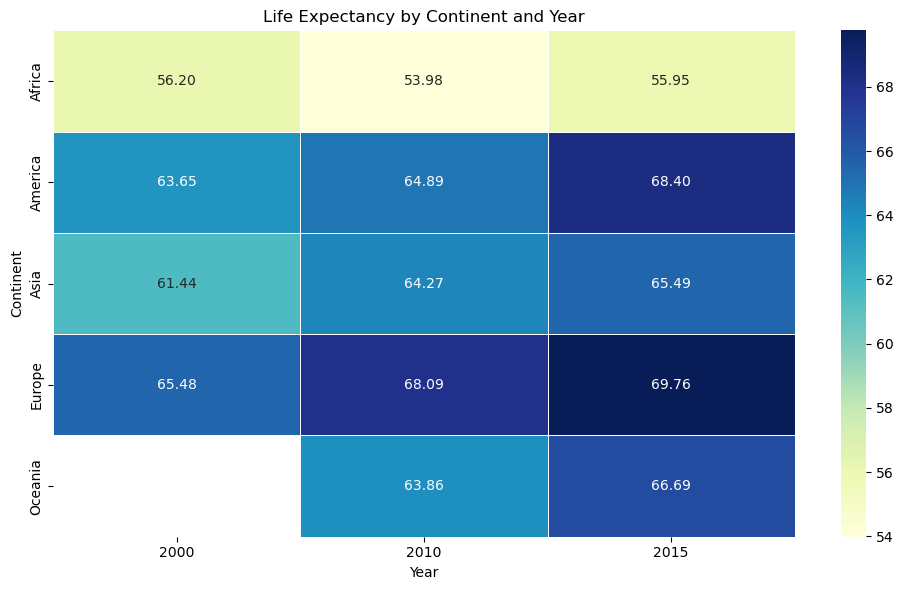

In [18]:
# Aggregate data by continent
continent_lifeExp = medProf_lifeExp.groupby(['Continent', 'Period']).agg({
    'Years': 'mean'
}).reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = continent_lifeExp.pivot(index='Continent', columns='Period', values='Years')

# Plot:
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Life Expectancy by Continent and Year')
plt.xlabel('Year')
plt.ylabel('Continent')
plt.tight_layout()
plt.show()

**Note: Data of Oceania in 2000 is missing from the original dataset, hence it is shown as "white" in this heatmap.**

**<u>Why this chart?<u>:** We chose to represent the data using a heatmap because it allows us to visually compare the average life expectancy across different continents over time. By aggregating the data by continent and then pivoting it into a matrix format, we can create a clear representation where each cell in the heatmap corresponds to the average life expectancy for a specific continent and year. 
    
The color gradient in the heatmap provides an intuitive way to spot differences in life expectancy values, with dark blue colors indicating higher life expectancies and yellow colors indicating lower life expectancies. Additionally, we annotated the heatmap with precise values to enhance the clarity of the visualization. 

**<u>Interpretation<u>:**
- Generally, Europe tends to have the highest average life expectancy (around 65 - 69.79 years).** This is followed by America, with an average life expectancy falling between approximately 63 to 68.39 years, and Oceania, with a range of approximately 63 to 66.67 years. Asia follows closely, with an average life expectancy spanning from approximately 61 to 65.49 years. **Africa consistently exhibits the lowest average life expectancy among the five continents, ranging from approximately 54 to 55.94 years.**
    
- Furthermore, it is noteworthy that **all continents have experienced an overall increase in life expectancy over the years. However, Africa stands out as it experienced a slight decrease in life expectancy in 2010 compared to other years.** The period from 2001 to 2010 in Africa was marked by a combination of significant events and challenges across the continent. While it is difficult to provide an exhaustive list, there are some notable occurrences during this time frame, which might lead to a decrease in life expectancy of Africa, such as HIV/AIDS Epidemic, Darfur Conflict (Sudan) (which began in the early 2000s, escalated during this period, leading to widespread violence, displacement, and humanitarian crises).


### 2.2. Life expectancy by Gender in each continent

Next, we will explore the average life expectancy of both genders in each continent for the years 2000, 2010, and 2015.

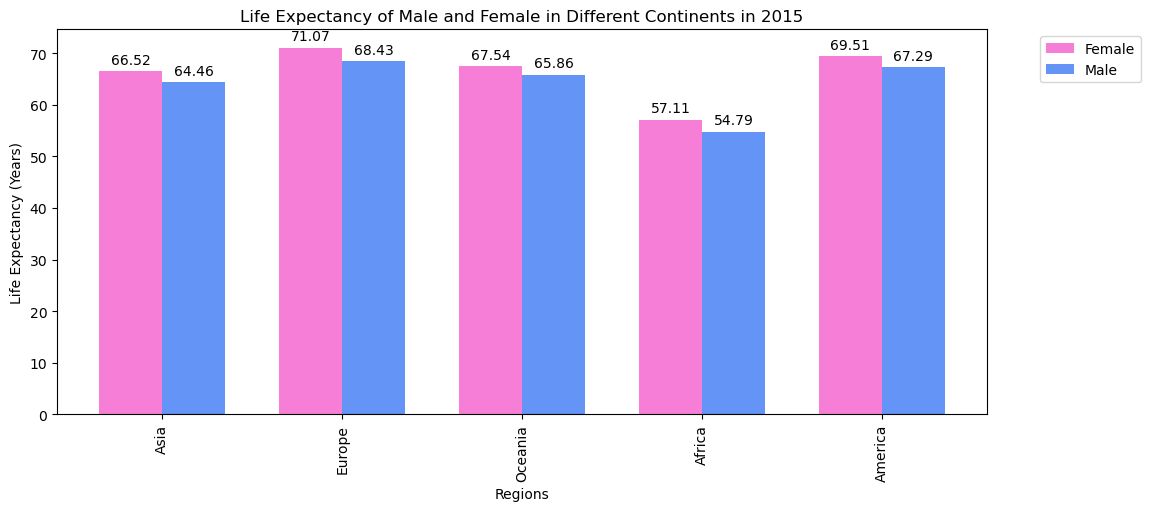

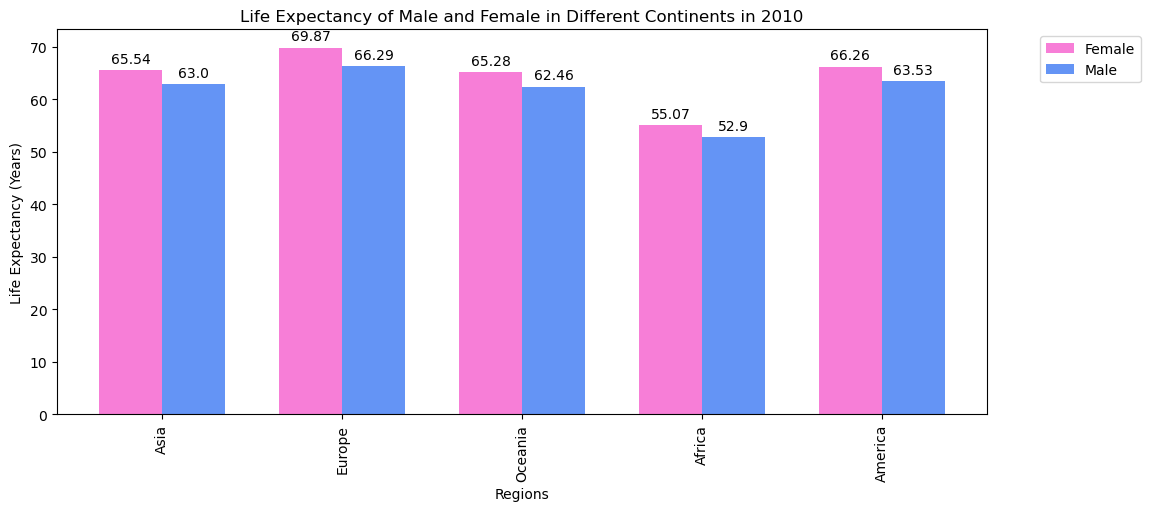

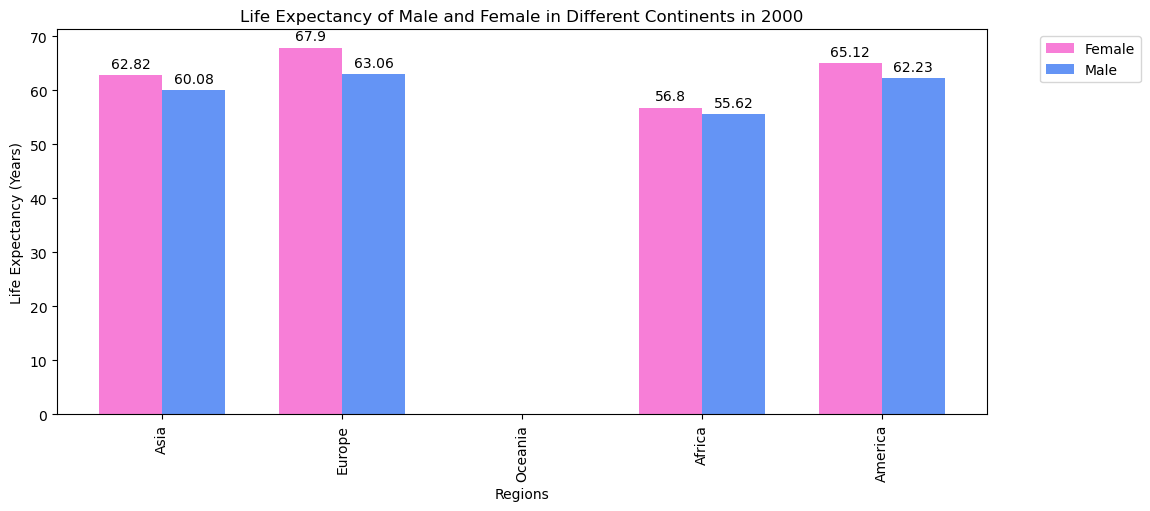

In [19]:
# Take a list of continents and years (200, 2010, 2015):
continents = medProf_lifeExp['Continent'].unique()
period = medProf_lifeExp['Period'].unique()

# Iterate over periods to get mean life expectancy of males and females for each year:
for year in period:
    
    # Empty lists for each year:
    data_male = []
    data_female = []
    
    # Iterate over each continent to get mean life expectancy of males and females:
    for cont in continents:
        # Filter data for the current year and continent
        filtered_data_male = medProf_lifeExp[(medProf_lifeExp['Continent'] == cont) & 
                                             (medProf_lifeExp['Sex'] == 'Male') & 
                                             (medProf_lifeExp['Period'] == year)]
        filtered_data_female = medProf_lifeExp[(medProf_lifeExp['Continent'] == cont) & 
                                               (medProf_lifeExp['Sex'] == 'Female') & 
                                               (medProf_lifeExp['Period'] == year)]
        
        # Check if data is available for the current continent and year
        if not filtered_data_male.empty and not filtered_data_female.empty:
            data_male.append(filtered_data_male['Years'].mean())
            data_female.append(filtered_data_female['Years'].mean())
        else:
            # If data is not available, append NaN to indicate missing data
            data_male.append(np.nan)
            data_female.append(np.nan)
    
    # Plotting:
    x_index = np.arange(len(continents))
    width = 0.35
    fig, ax = plt.subplots(figsize=(12, 5))
    rect1 = ax.bar(x_index - width / 2, data_female, width=width, color='#f77ed7', label='Female')
    rect2 = ax.bar(x_index + width / 2, data_male, width=width, color="#6494f5", label='Male')

    plt.xticks(x_index, labels=continents, rotation=90)
    plt.xlabel("Regions")
    plt.ylabel("Life Expectancy (Years)")
    plt.title(f"Life Expectancy of Male and Female in Different Continents in {year}")
    
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

    # Function to add labels on top of bars
    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            if not np.isnan(height):
                ax.annotate('{}'.format(round(height, 2)),
                            xy=(rect.get_x() + rect.get_width() / 2, height),
                            xytext=(0, 3),  # 3 points vertical offset
                            textcoords="offset points",
                            ha='center', va='bottom')

    autolabel(rect1)
    autolabel(rect2)

    plt.show()


**<u>Why this chart?<u>:** We chose bar charts, because bar charts are effective for comparing quantitative data between different categories or groups, making them ideal for comparing the average life expectancy of males and females across continents. Also, bar charts allow for the simultaneous comparison of multiple variables (average life expectancy of males and females) within each category (continent) and across multiple categories (years).

**<u>Interpretation<u>:** 
- In general, **females tend to have a higher average life expectancy than males across all continents.** The same trend (as mentioned above) was witnessed here, with Europe consistently exhibiting higher life expectancy for both genders compared to other continents. Over the years, there has been an overall increase in life expectancy for both genders across all continents, except for Africa, which experienced a slight decrease in 2010. 

- Interestingly, we observed that **Europe has the highest difference between the average life expectancy of females and males**, ranging from approximately 3 to 4.8 years, whereas for other continents, the difference typically falls within the range of 1 to 2 years

## 3. Healthcare and Life Expectancy Disparities

### 3.1. Countries with Highest/Lowest life expectancy by continent

Now, we will delve deeper into each continent to identify the top five and bottom five countries with the highest and lowest life expectancy, respectively, based on the most recent year available in the original dataset. Therefore, in this section, **we exclusively analyze the data of the year 2015**.

**<u>Why this chart?<u>:** We chose horizontal bar charts to effectively visualize the countries with the highest and lowest life expectancies within each continent for the year 2015. The horizontal orientation allows for longer country names to be displayed without overlapping, enhancing readability. 

We used different colors (green for top countries, red for bottom countries) to clearly distinguish between countries with the highest and lowest life expectancies. This color differentiation enhances visual clarity and makes it easier for viewers to interpret the data.

Also, we included a dashed blue line representing the average life expectancy for each continent, which is served as a benchmark for comparing individual countries' life expectancies and understanding their relative positions.

In [20]:
# Filter data for the year 2019
filtered_data_2019 = lifeExp[lifeExp['Period'] == 2019]

# Use the square of the life expectancy as the new size to enhance differentiation
filtered_data_2019['size'] = filtered_data_2019["First Tooltip"]**5

# Normalize the new size for better visualization
# We use min-max scaling here to keep the transformation within a range that is suitable for the plot
min_max_scaler = preprocessing.MinMaxScaler()
filtered_data_2019['size_scaled'] = min_max_scaler.fit_transform(filtered_data_2019[['size']])



C:\Users\trana\AppData\Local\Temp\ipykernel_18740\4197711912.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2019['size'] = filtered_data_2019["First Tooltip"]**5
C:\Users\trana\AppData\Local\Temp\ipykernel_18740\4197711912.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2019['size_scaled'] = min_max_scaler.fit_transform(filtered_data_2019[['size']])


In [21]:


# Plot the updated bubble world map using the scaled sizes
fig = px.scatter_geo(
    filtered_data_2019,  # Updated DataFrame with scaled sizes
    locations="Location",
    locationmode='country names',
    color="Location",
    size="size_scaled",  # Use the new scaled size
    hover_name="Location",
    projection="natural earth",
    title="Life Expectancy for All Countries in 2019",
)

# Show the figure
fig.show()


Bubble chart Life expectancy:

Interpretation: Before diving deep into each specific continent, we are going to have a brief
overview of the global life expectancy in 2019 through this bubble chart.
As clearly seen, many big bubbles cluster around EU (e.g. Italy, France, Estonia, ...) and Middle
East (UAE, Saudi Arabia, Lebanon,...). Meanwhile, Africa seems to not have any big bubble,
suggesting lower expectancy in many African nations

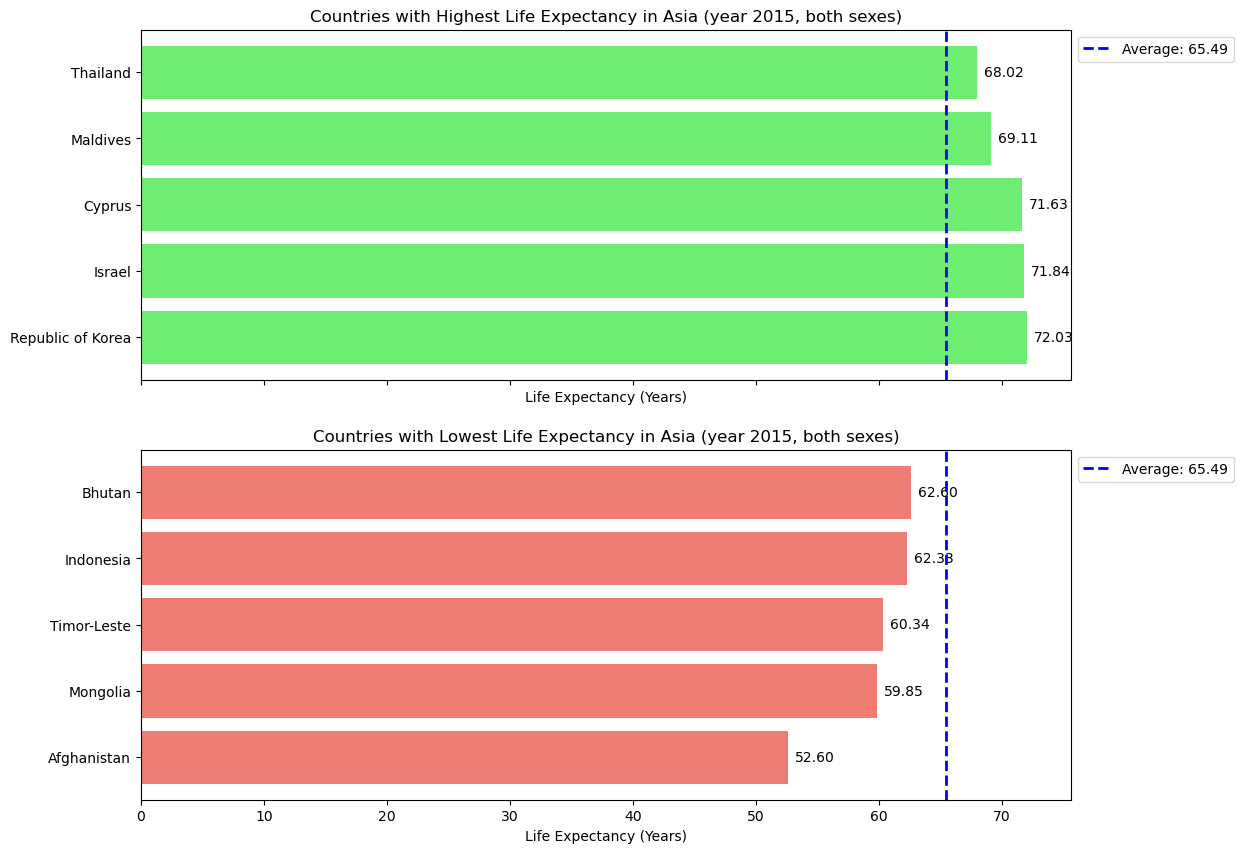

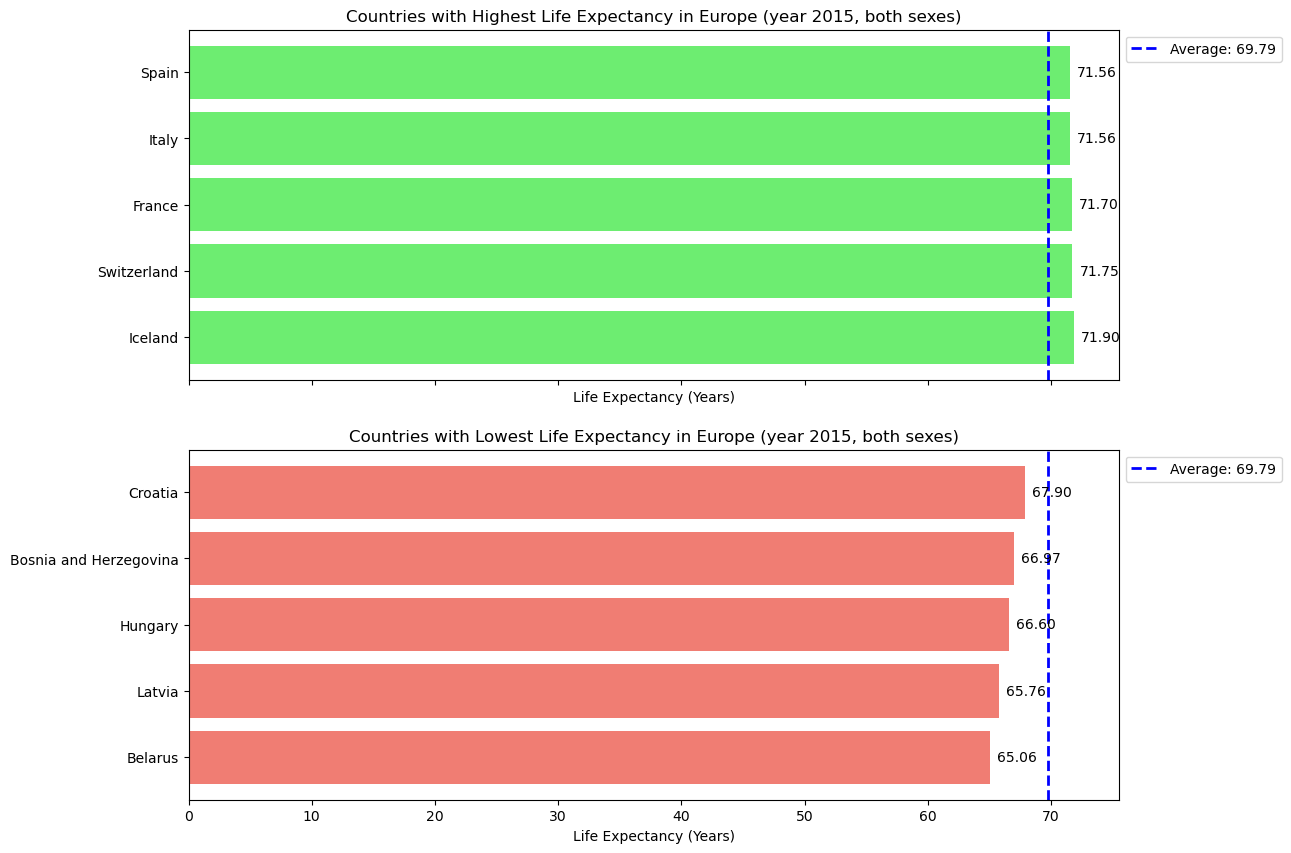

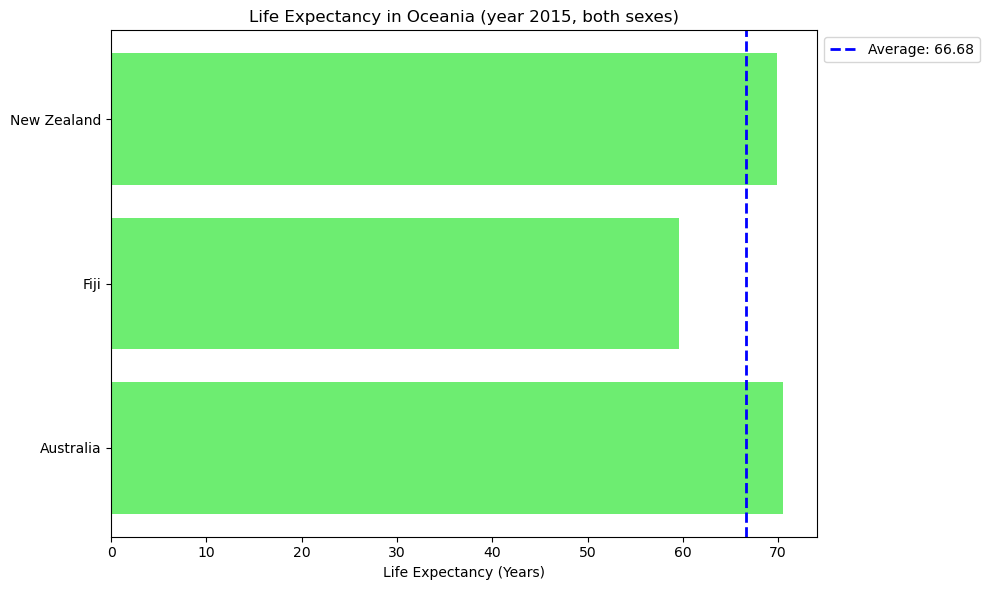

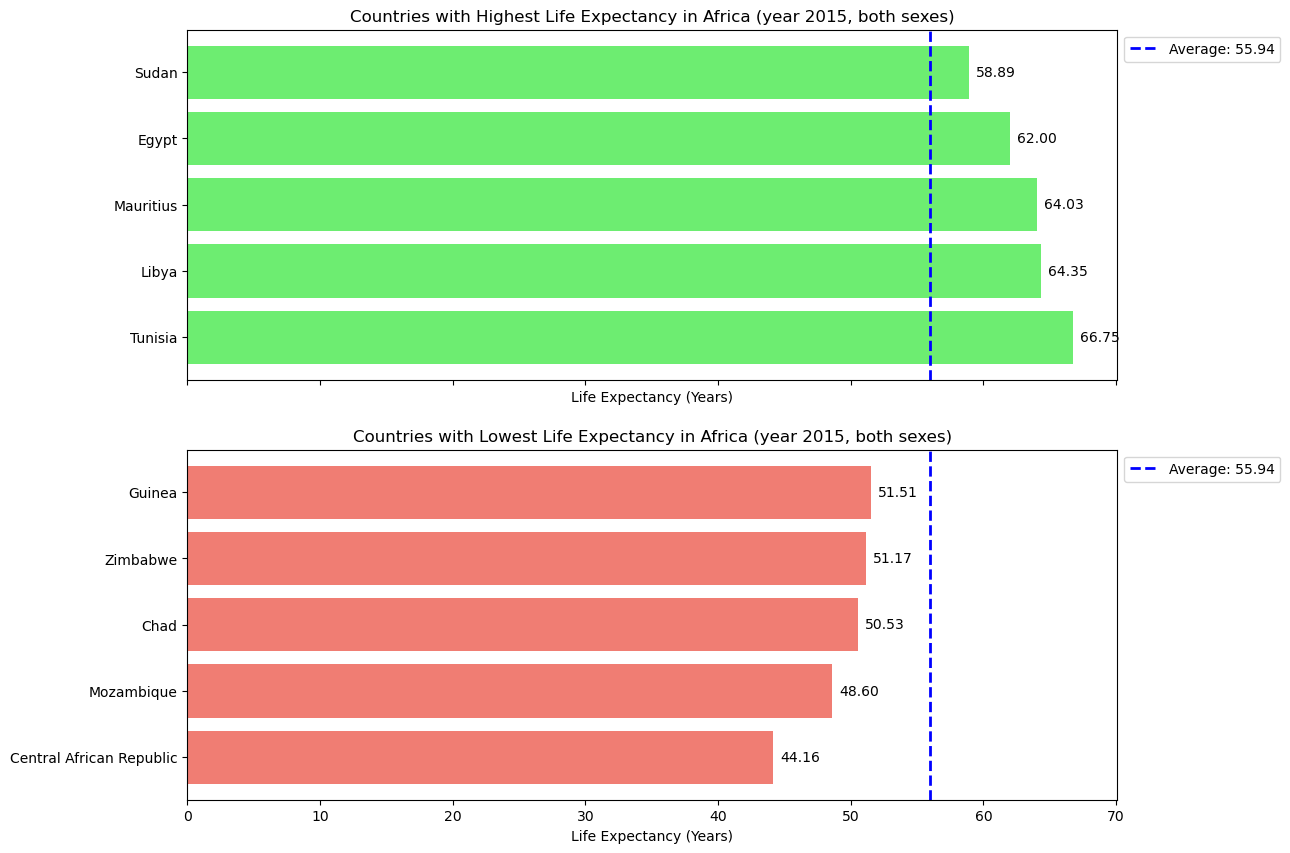

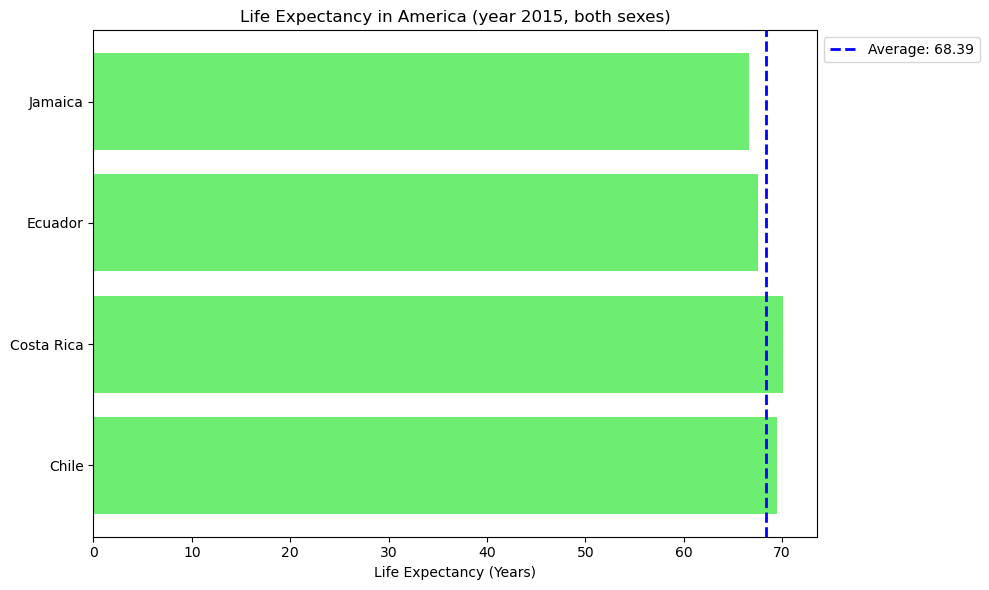

In [22]:
# Ploting Countries with Highest / Lowest life expectancy by continent:

# Define the colors for the bars
top_color = "#6ded71"   # Green color for top 5 life expectancy
bottom_color = "#f07d73"   # Red color for bottom 5 life expectancy

# Iterate over continents
for continent in continents:
    # Filter data for the continent and the year 2015
    continent_data = medProf_lifeExp[(medProf_lifeExp['Continent'] == continent) & 
                                      (medProf_lifeExp['Sex'] == 'Both sexes') & 
                                      (medProf_lifeExp['Period'] == 2015)]
    
    # Calculate average life expectancy for the continent
    continent_avg = continent_data['Years'].mean()

    # Plotting_t
    # Because Oceania and America only have few countries, we just plot all countries, instead of showing top/bottom countries:
    if continent == 'Oceania' or continent == 'America':
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.barh(continent_data['Location'], continent_data['Years'], color=top_color)
        ax.axvline(x=continent_avg, color='blue', linestyle='--', label=f'Average: {continent_avg:.2f}', linewidth=2)
        ax.set_title(f"Life Expectancy in {continent} (year 2015, both sexes)")
        ax.set_xlabel("Life Expectancy (Years)")
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()
    else:
         # Get top and bottom 5 countries with highest and lowest life expectancy
        top_5 = continent_data.nlargest(5, 'Years')  # Get top 5
        bottom_5 = continent_data.nsmallest(5, 'Years')  # Get bottom 5

        # Plotting
        fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        # Plot top 5 life expectancy
        top_bars = axes[0].barh(top_5['Location'], top_5['Years'], color=top_color)
        axes[0].set_title(f"Countries with Highest Life Expectancy in {continent} (year 2015, both sexes)")
        axes[0].set_xlabel("Life Expectancy (Years)")

        # Annotate top bars with values
        for bar in top_bars:
            axes[0].annotate(f'{bar.get_width():.2f}', 
                             xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                             xytext=(5, 0),  
                             textcoords='offset points',
                             va='center', ha='left')

        # Plot bottom 5 life expectancy
        bottom_bars = axes[1].barh(bottom_5['Location'], bottom_5['Years'], color=bottom_color)
        axes[1].set_title(f"Countries with Lowest Life Expectancy in {continent} (year 2015, both sexes)")
        axes[1].set_xlabel("Life Expectancy (Years)")

        # Annotate bottom bars with values
        for bar in bottom_bars:
            axes[1].annotate(f'{bar.get_width():.2f}', 
                             xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                             xytext=(5, 0),  
                             textcoords='offset points',
                             va='center', ha='left')

        # Add average line
        axes[0].axvline(x=continent_avg, color='blue', linestyle='--', label=f'Average: {continent_avg:.2f}', linewidth=2)
        axes[1].axvline(x=continent_avg, color='blue', linestyle='--', label=f'Average: {continent_avg:.2f}', linewidth=2)

        # Add legend
        axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

        # Adjust layout and display the plot
        #plt.tight_layout()
        plt.show()




**Note: Because Oceania and America only have few countries, we plot all countries, instead of indentifying top/bottom countries.**

**<u>Interpretation<u>:** In 2015,
- **Asia**: Republic of Korea has the highest life expectancy (72.03 years), followed by Israel, Cyprus, Maldives and Thailand. Meanwhile, Afghanistan has the lowest life expectancy (52.6 years, which is neraly 13 years below the average life expectancy of Asia). The second lowest in Mongolia, followed by Timor-Leste, Indonesia, and Bhutan.
- **Europe**: Iceland has the highest life expectancy (71.90 years), followed by Switzerland, France, Italy and Spain. We can notice that these top 5 countries have almost same average life expectancy. Meanwhile, Belarus has the lowest life expectancy (65.06 years, which is around 5 years below the average life expectancy of Europe). 
- **Africa**: Tunisia has the highest life expectancy (66.75 years), followed by Libya, Mauritius, Egypt, and Sudan. Meanwhile, Central African Republic has the lowest life expectancy (44.16 years, which is around 11.78 years below the average life expectancy of Africa). 

### 3.2 Countries with Highest/Lowest medical professional density

Similarly, we will look at top/bottom 5 countries with highest/lowest medical professional density (per 10 000 persons).

**<u>Why this chart?<u>:** same as above.

In [23]:
#bubblechartDoctorpharmacist
import pandas as pd
import plotly.express as px

# Plot bubble world map for total density of doctors and pharmacists
fig = px.scatter_geo(
    medProf,
    locations="Location",
    locationmode='country names',
    color="Location",
    size="Total Density",
    hover_name="Location",
    projection="natural earth",
    title="Total Density of Doctors and Pharmacists in 2018",
)

fig.show()

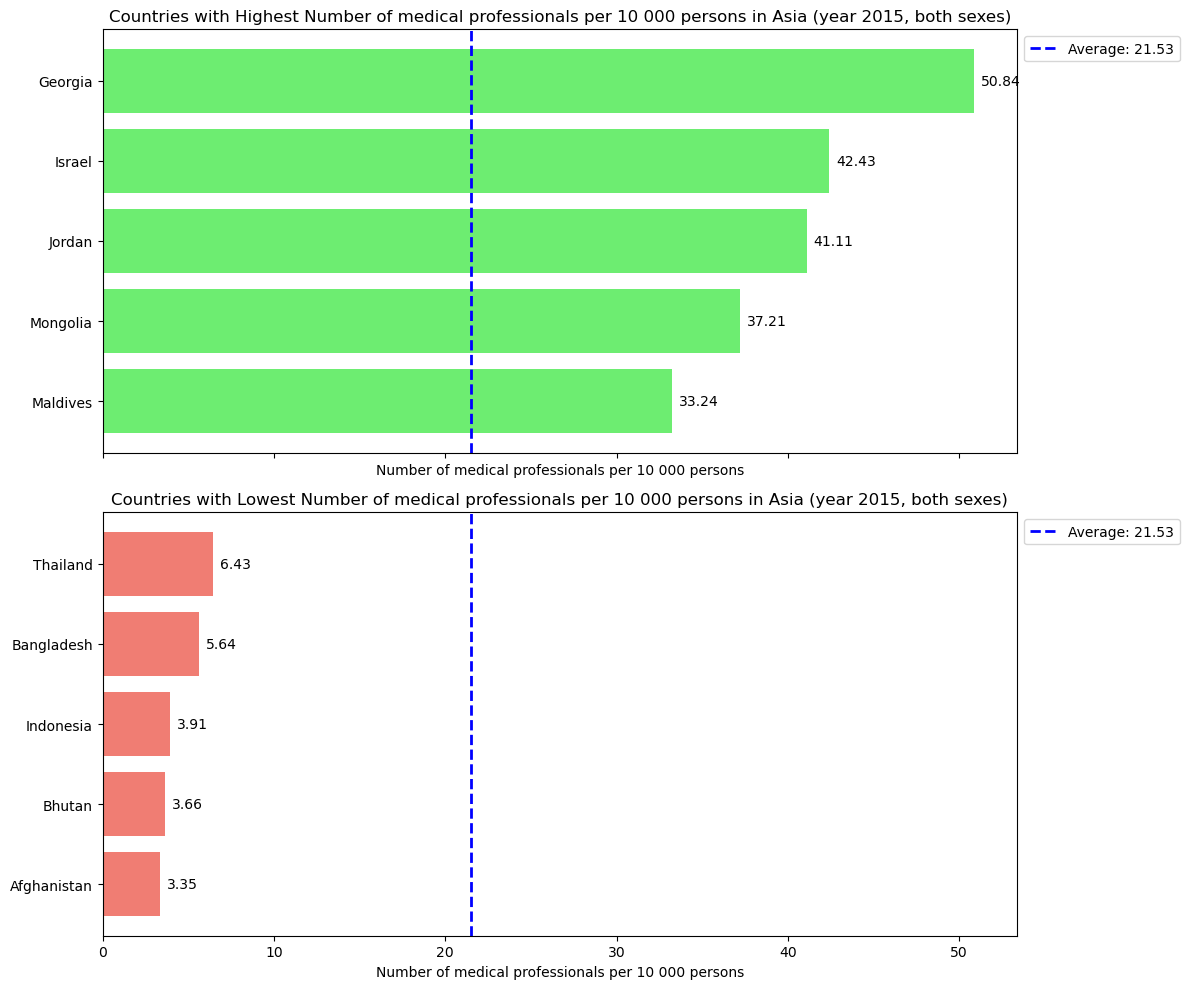

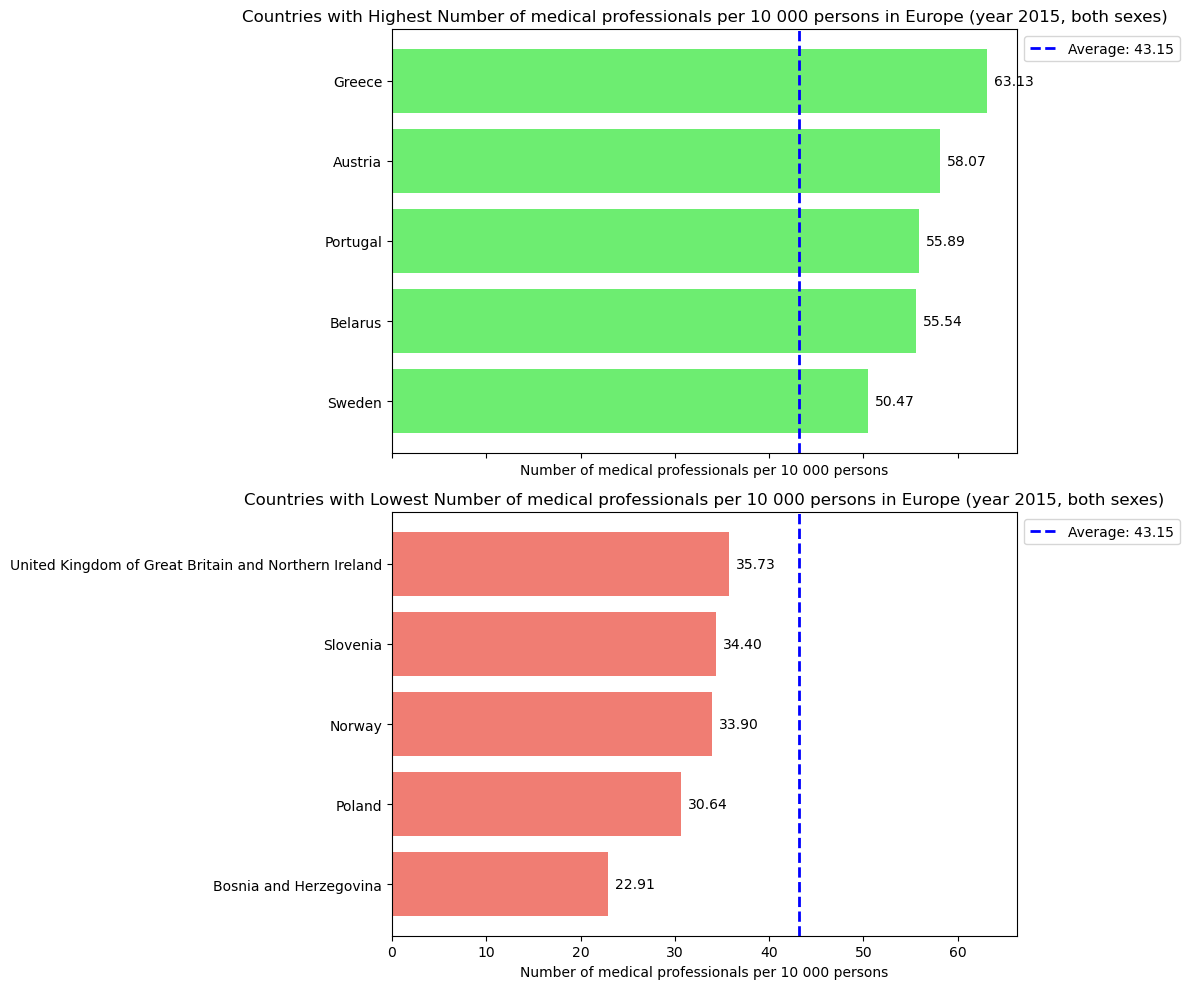

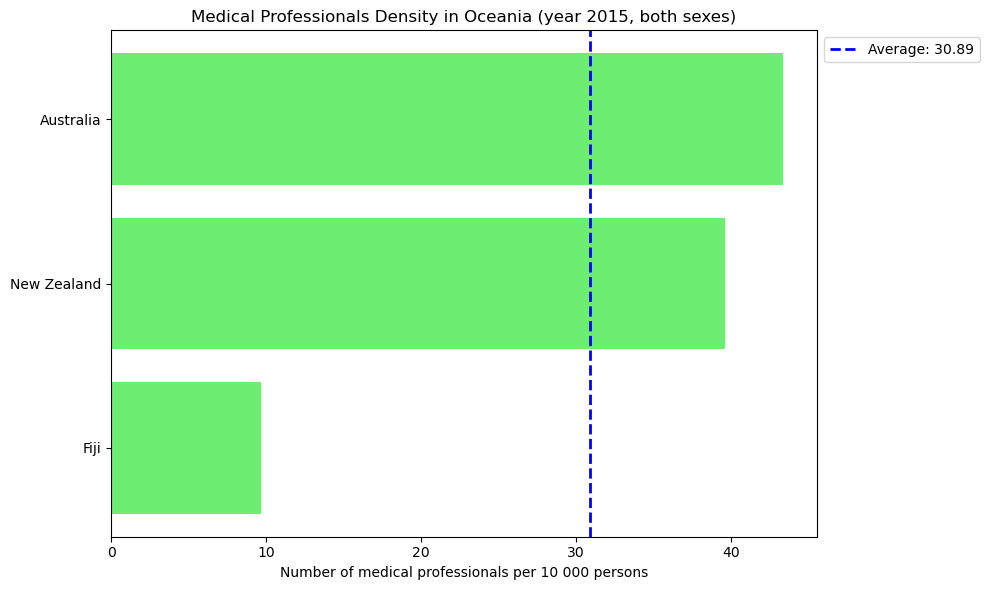

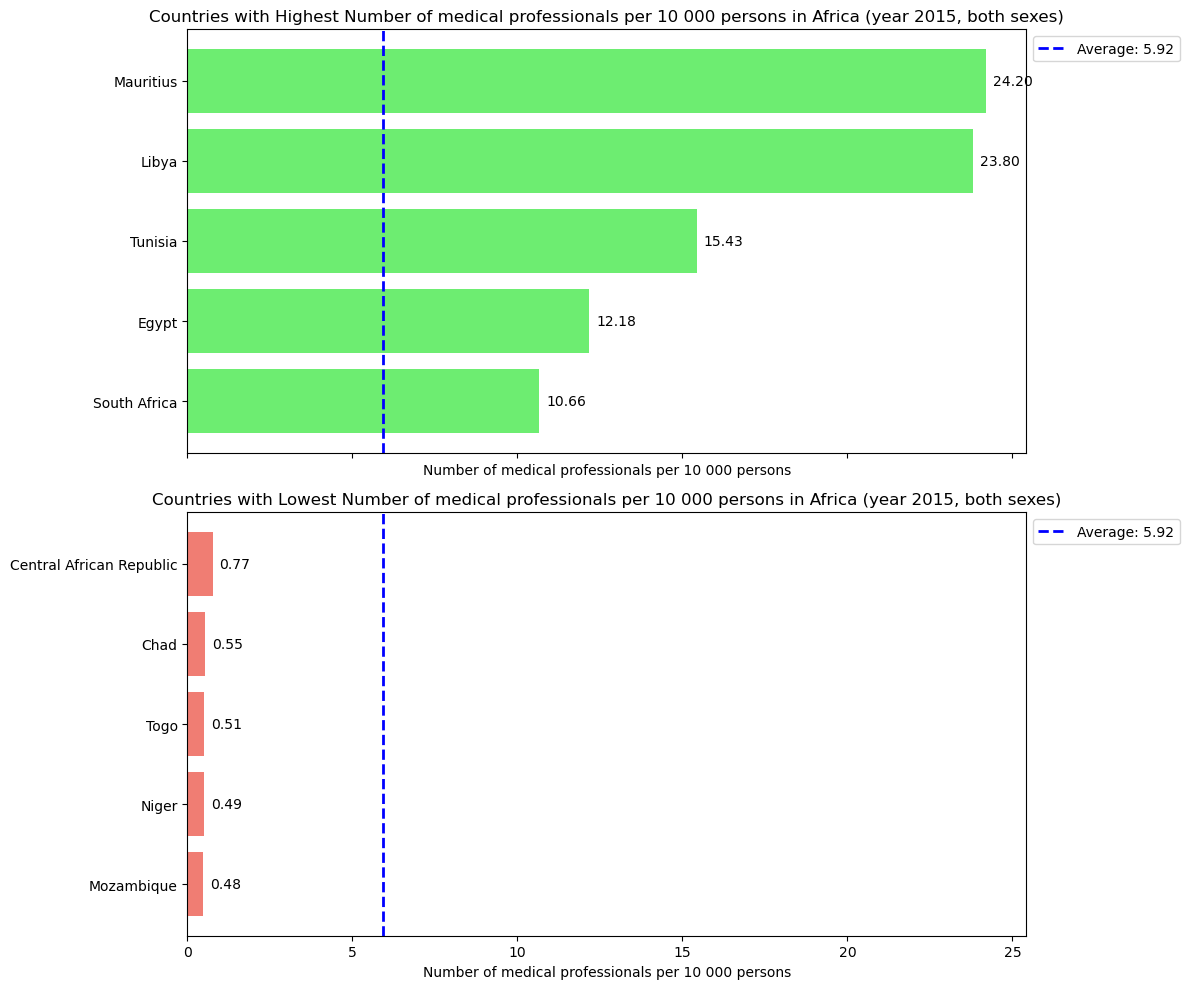

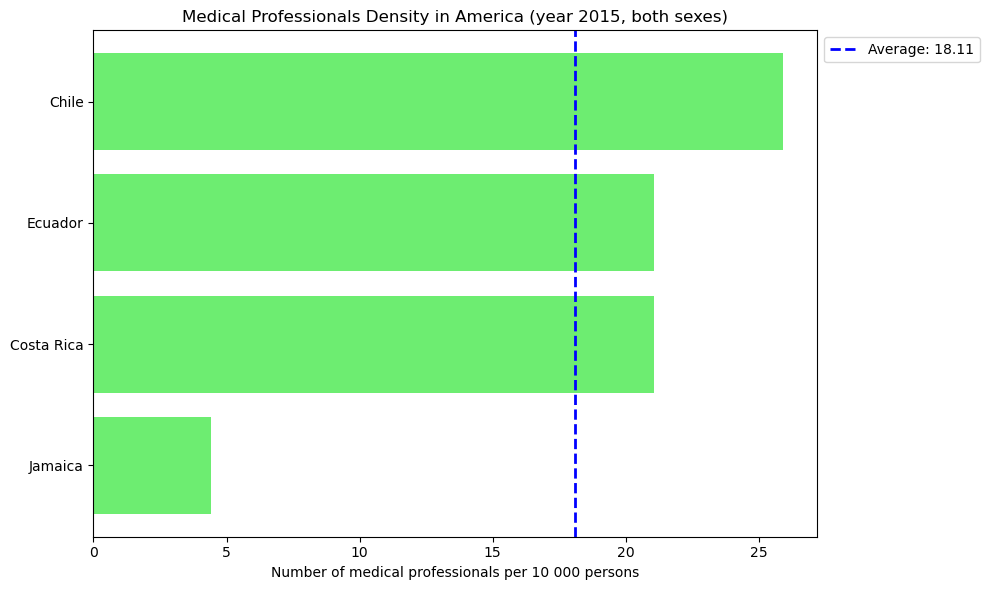

In [24]:
# Define the colors for the bars
top_color = "#6ded71"   # Green color for top 5 life expectancy
bottom_color = "#f07d73"   # Red color for bottom 5 life expectancy

# Iterate over continents
for continent in continents:
    # Filter data for the continent and the year 2015
    continent_data = medProf_lifeExp[(medProf_lifeExp['Continent'] == continent) & 
                                      (medProf_lifeExp['Sex'] == 'Both sexes') & 
                                      (medProf_lifeExp['Period'] == 2015)]
    continent_data = continent_data.groupby('Location')['Total Density'].mean().sort_values().reset_index()

    # Calculate average number of medical professionals (density) for the continent
    continent_avg = continent_data['Total Density'].mean()
    
    # Because Oceania and America only have few countries, we just plot all countries, instead of showing top/bottom countries:
    if continent == 'Oceania' or continent == 'America':
        fig, ax = plt.subplots(figsize=(10, 6))
        ax.barh(continent_data['Location'], continent_data['Total Density'], color=top_color)
        ax.axvline(x=continent_avg, color='blue', linestyle='--', label=f'Average: {continent_avg:.2f}', linewidth=2)
        ax.set_title(f"Medical Professionals Density in {continent} (year 2015, both sexes)")
        ax.set_xlabel("Number of medical professionals per 10 000 persons")
        ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()
        
    else:
        # Get top and bottom 5 countries with highest and lowest total density:
        top_5 = continent_data.tail(5)
        bottom_5 = continent_data.head(5)

        # Plotting
        fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

        # Plot top 5 life expectancy
        top_bars = axes[0].barh(top_5['Location'], top_5['Total Density'], color=top_color)
        axes[0].set_title(f"Countries with Highest Number of medical professionals per 10 000 persons in {continent} (year 2015, both sexes)")
        axes[0].set_xlabel("Number of medical professionals per 10 000 persons")

        # Annotate top bars with values
        for bar in top_bars:
            axes[0].annotate(f'{bar.get_width():.2f}', 
                             xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                             xytext=(5, 0),  
                             textcoords='offset points',
                             va='center', ha='left')

        # Plot bottom 5 life expectancy
        bottom_bars = axes[1].barh(bottom_5['Location'], bottom_5['Total Density'], color=bottom_color)
        axes[1].set_title(f"Countries with Lowest Number of medical professionals per 10 000 persons in {continent} (year 2015, both sexes)")
        axes[1].set_xlabel("Number of medical professionals per 10 000 persons")

        # Annotate bottom bars with values
        for bar in bottom_bars:
            axes[1].annotate(f'{bar.get_width():.2f}', 
                             xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                             xytext=(5, 0),  
                             textcoords='offset points',
                             va='center', ha='left')

        # Add average line
        axes[0].axvline(x=continent_avg, color='blue', linestyle='--', label=f'Average: {continent_avg:.2f}', linewidth=2)
        axes[1].axvline(x=continent_avg, color='blue', linestyle='--', label=f'Average: {continent_avg:.2f}', linewidth=2)

        # Add legend
        axes[0].legend(loc='upper left', bbox_to_anchor=(1, 1))
        axes[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()


**Note: Because Oceania and America only have few countries, we plot all countries, instead of indentifying top/bottom countries.**

**<u>Interpretation<u>:** In 2015,
- **Asia**: Georgia has the highest medical professional density (50.84 doctors and pharmacists), followed by Israel, Jordan, Mongolia and Maldives. Meanwhile, Afghanistan has the lowest medical professional density (3.35, which is neraly 18 below the average density of Asia). The second lowest is Bhutan, followed by Indonesia, Bangladesh and Thailand. 
- **Europe**: Greece has the highest medical professional density (63.13 doctors and pharmacists), followed by Austria, Portugal, Belarus, and Sweden. Meanwhile, Bosnia and Herzegovina have the lowest medical professional density (22.91, which is around 20 below the average density of Europe). 
- **Africa**: Mauritius has the highest medical professional density (24.20 doctors and pharmacists), followed by Libya, Tunisia, Egypt, and South Africa. Meanwhile, Mozambique has the lowest medical professional density (0.48, which is around 5 below the average density of Afica). Notbaly, we can observe that countries at the bottom end of the spectrum  demonstrate a ratio of less than 1 doctor or pharmacist per 10,000 individuals.

#### Interesting observation

**Our initial hypothesis suggested a correlation between countries excelling in life expectancy and those boasting high densities of medical professionals.** However, upon scrutinizing the top and bottom countries within each continent based on life expectancy and medical professional density, it becomes apparent that **this assumption does not hold true across all continents.** In fact, there are few interesting observations. For instance, in Asia, Thailand ranks among the countries with the lowest medical professional density, yet it still achieves the highest life expectancy. Conversely, Mongolia, despite being one of the top countries in terms of medical professional density, exhibits a relatively low life expectancy.

Hence, now we are interested to explore the positions of countries having the highest medical professional densities in life expectancy map - which is illustrated in the next graph.
 

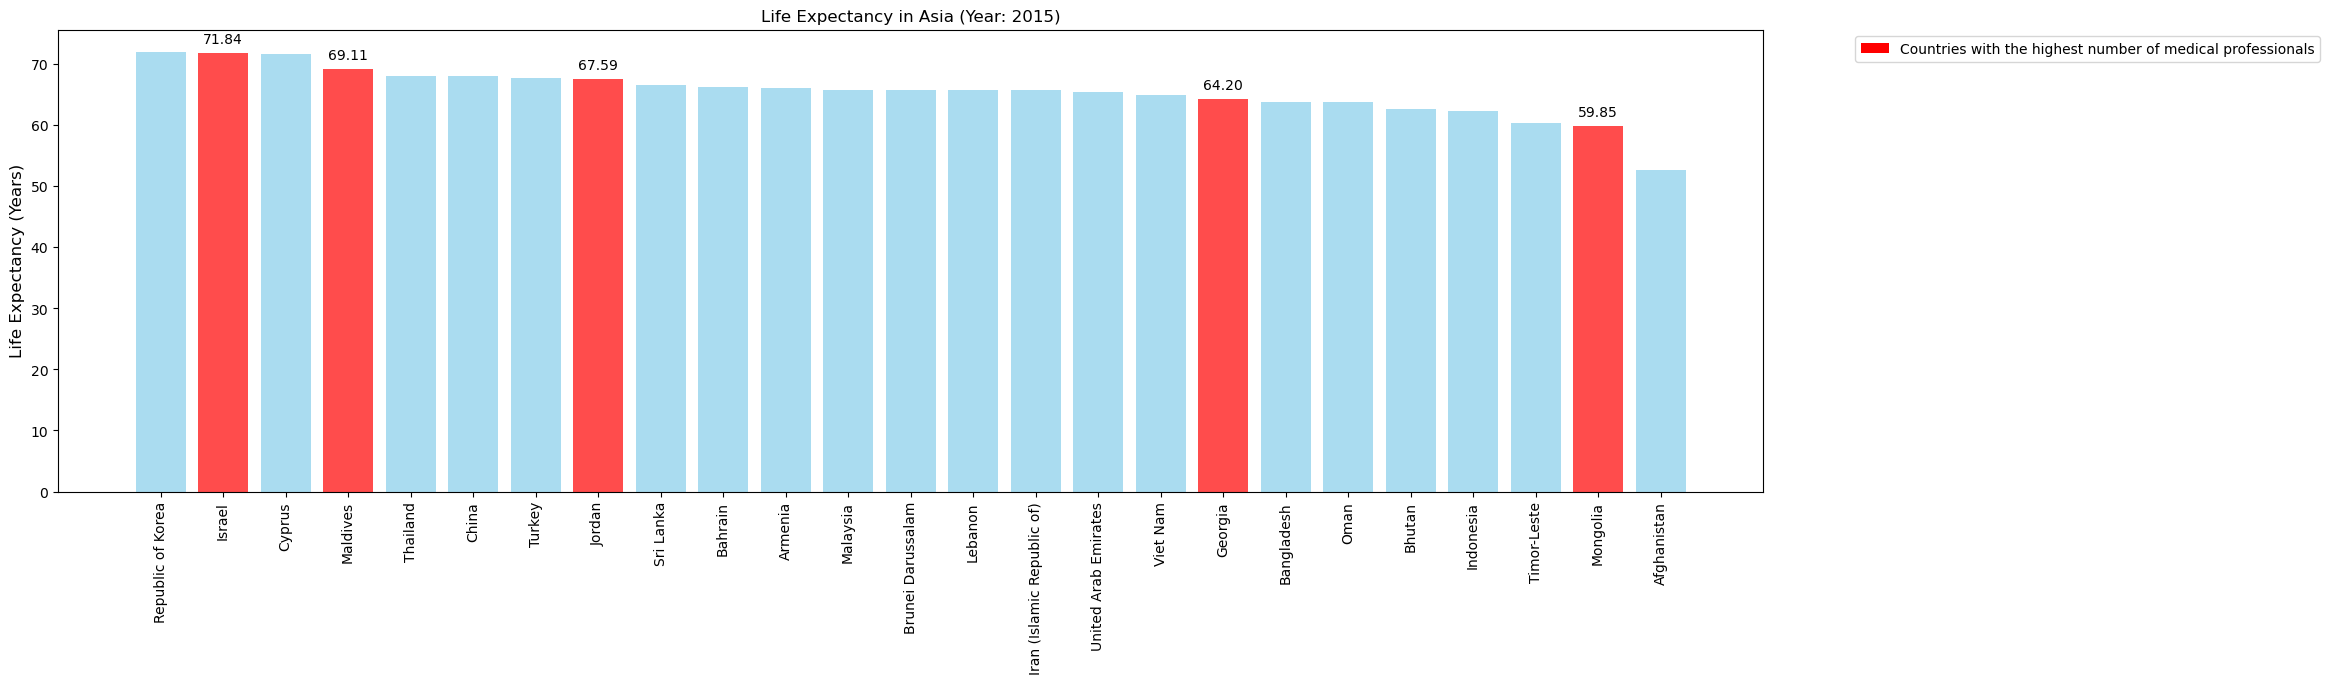

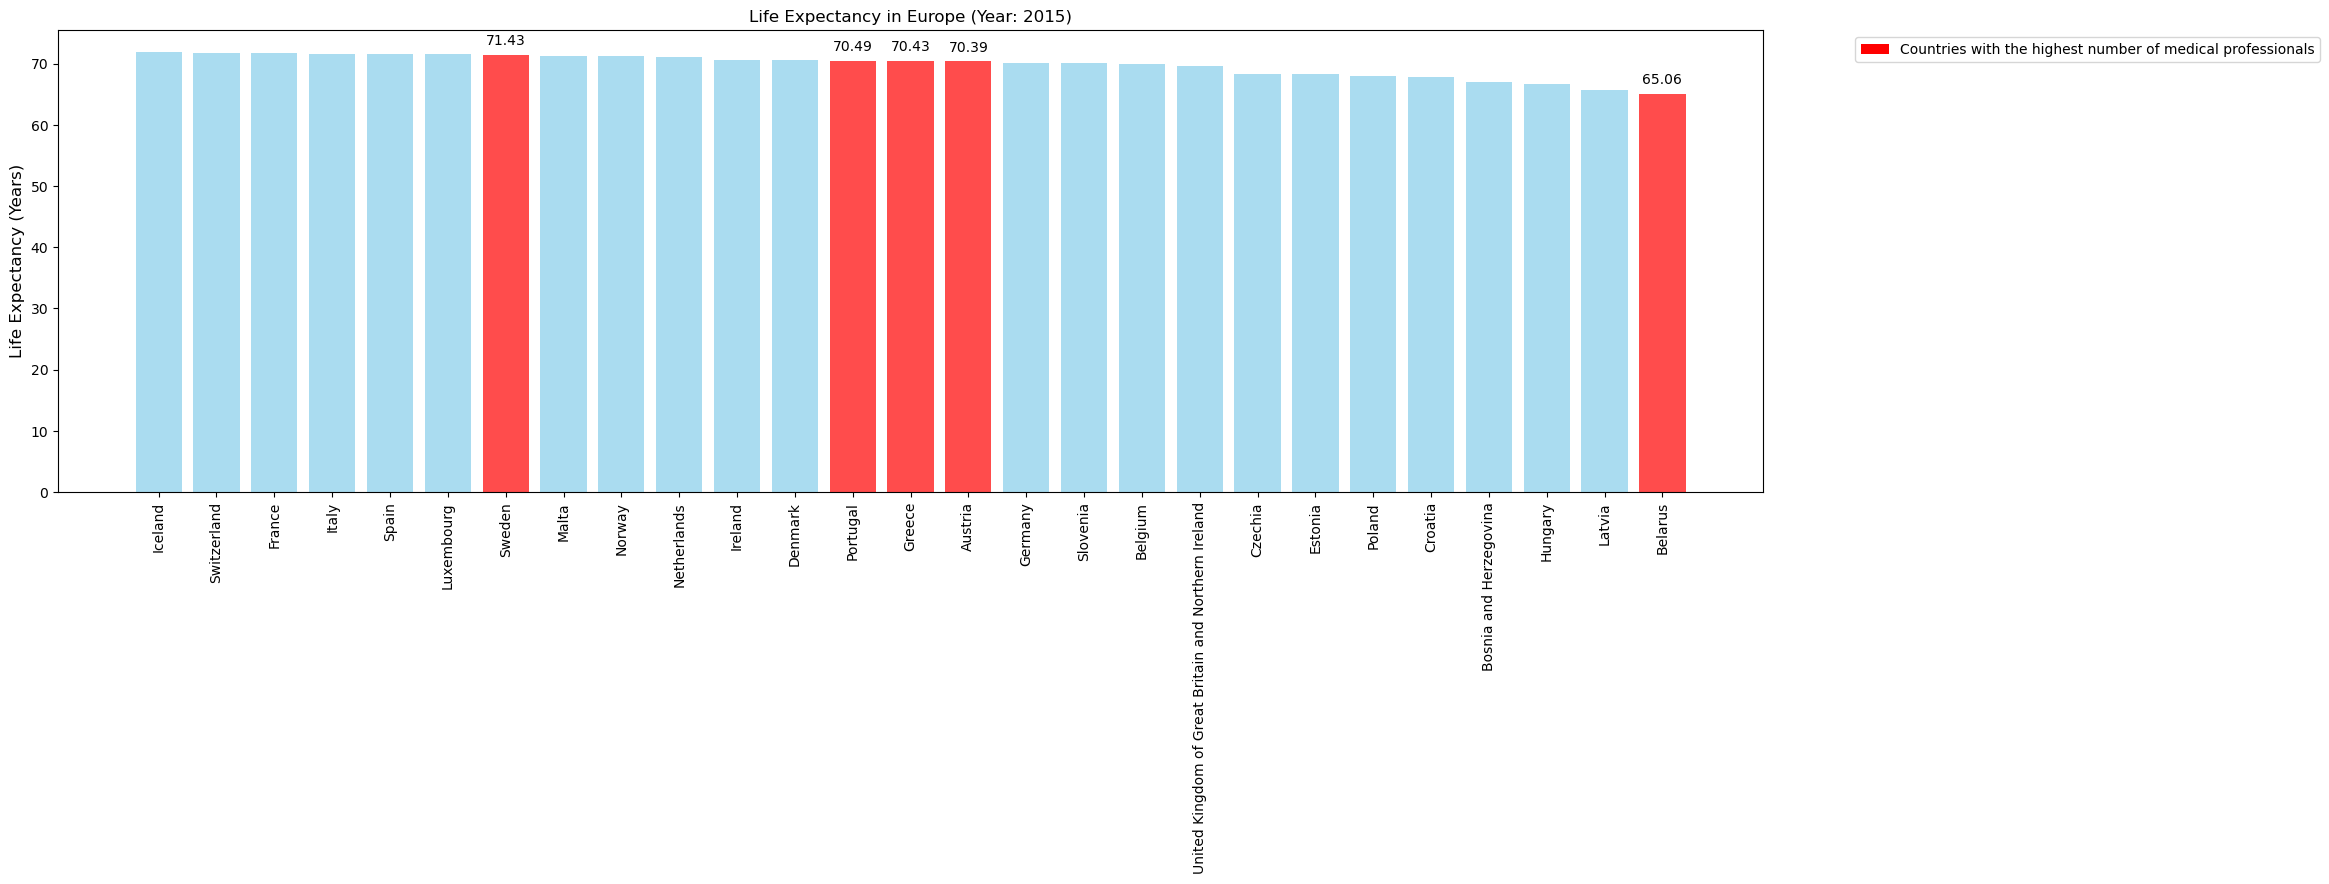

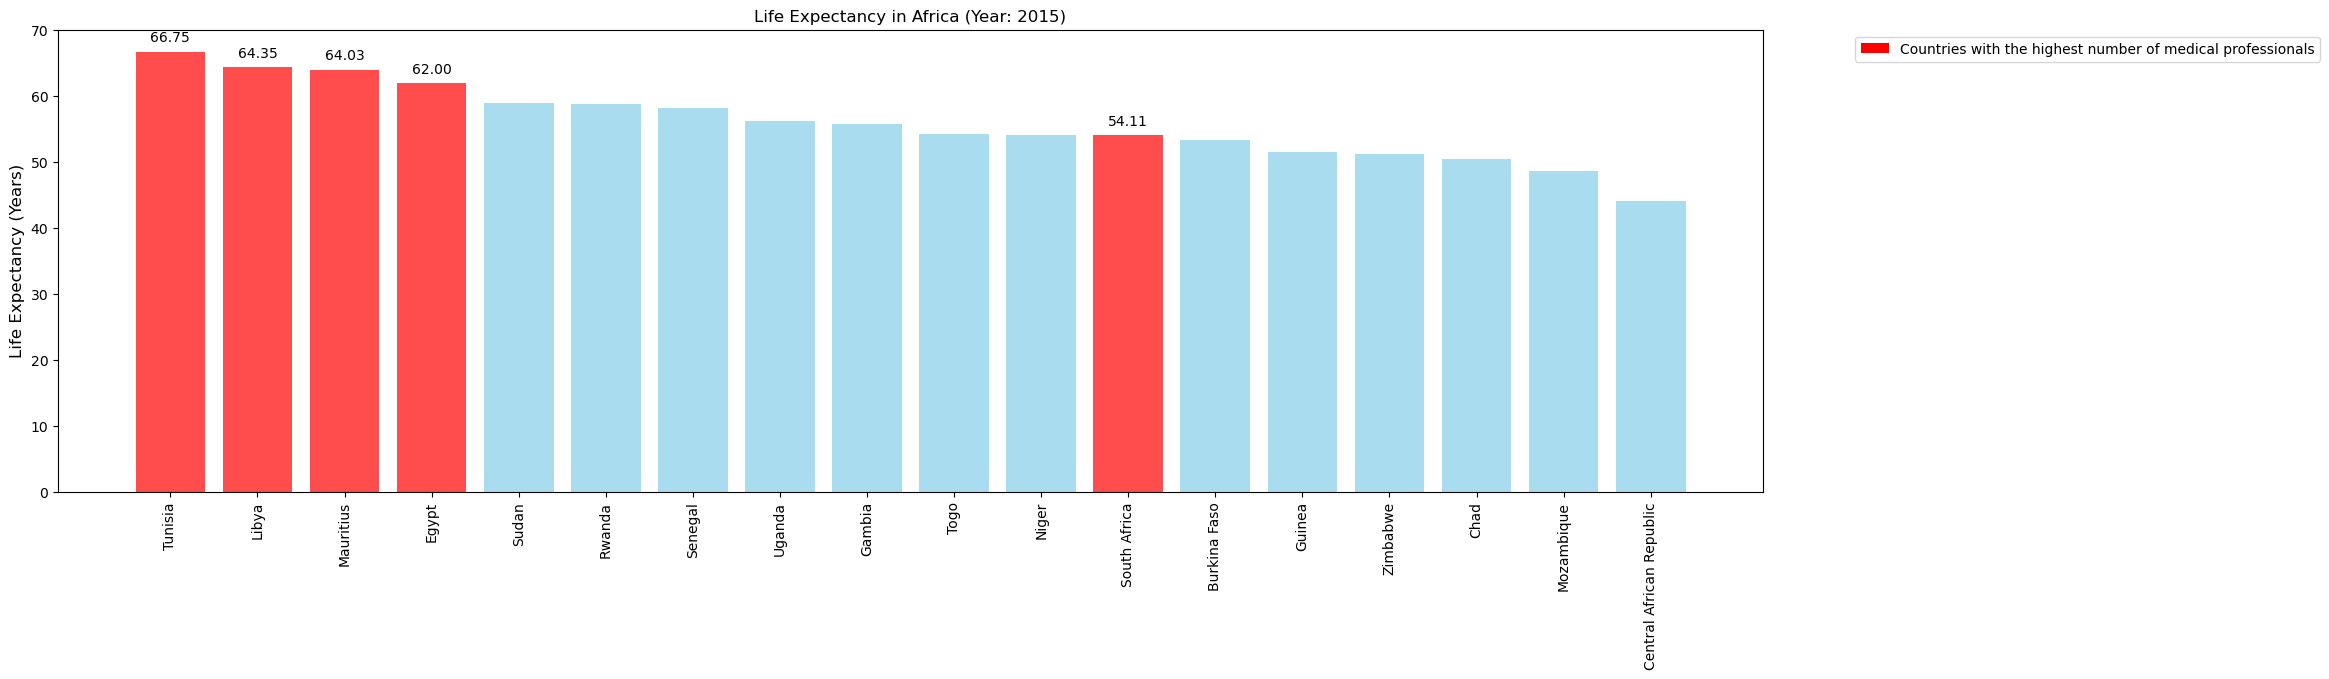

In [25]:
from matplotlib.patches import Patch

# since America & Oceania have only few countries, we focus on only Asia, Europe, Africa:
chosen_continents = ['Asia', 'Europe', 'Africa']

# Filter data for each continent and use only "Both sexes" value:
for continent in chosen_continents:
    # Get top 5 countries with highest total density
    density_data = medProf_lifeExp[(medProf_lifeExp['Continent'] == continent) & 
                                   (medProf_lifeExp['Sex'] == 'Both sexes') & 
                                   (medProf_lifeExp['Period'] == 2015)]
    density_data = density_data.groupby('Location')['Total Density'].mean().nlargest(5)
    
    # Get life expectancy data and sort in ascending order
    life_expectancy_data = medProf_lifeExp[(medProf_lifeExp['Continent'] == continent) & 
                                           (medProf_lifeExp['Sex'] == 'Both sexes') & 
                                           (medProf_lifeExp['Period'] == 2015)]
    life_expectancy_data = life_expectancy_data.groupby('Location')['Years'].mean().sort_values(ascending=False)
    
    # Plotting
    fig, ax_1 = plt.subplots(figsize=(22, 6))
    
    bars = ax_1.bar(life_expectancy_data.index, life_expectancy_data.values, color='skyblue', alpha=0.7) #label='Life Expectancy'
    
    ax_1.set_ylabel("Life Expectancy (Years)", fontsize=12)
    ax_1.tick_params(axis='x', rotation=90)
    
    # Highlight top density countries in life expectancy plot
    for country in density_data.index:
        idx = life_expectancy_data.index.get_loc(country)
        bars[idx].set_facecolor('r')
        
        # Annotate with life expectancy values
        ax_1.annotate(f"{life_expectancy_data[country]:.2f}", 
                      xy=(idx, life_expectancy_data[country]), 
                      xytext=(0, 5), 
                      textcoords="offset points", 
                      ha='center', 
                      va='bottom', 
                      fontsize=10)
    
    # Add legend labels
    handles, labels = ax_1.get_legend_handles_labels()
    ax_1.legend(handles + [Patch(facecolor='red')], labels + ['Countries with the highest number of medical professionals'], loc='upper left', bbox_to_anchor=(1.05, 1))
    
    plt.title(f"Life Expectancy in {continent} (Year: 2015)")
    plt.show()


**Note: Top countries (which have the highest medical professional density) are highlighted with red color.**

**<u>Why this chart?<u>:** We chose bar charts, because:
- The primary focus is to highlight countries with the highest density of medical professionals on the life expectancy plot.

- The bar chart displays the life expectancy of each country on the x-axis, while the y-axis represents the life expectancy in years. Each bar corresponds to a country's life expectancy, with the bars color-coded in sky blue.
    
- **Countries with the highest density of medical professionals are highlighted in red** on the life expectancy plot. These countries are annotated with their corresponding life expectancy values. This highlighting helps draw attention to the relationship between medical professional density and life expectancy within each continent.

- Legend labels are added to the chart to indicate the significance of the highlighted countries. 
    

**<u>Interpretation<u>:** The majority of top countries, which have the highest medical professional density, do not necessarily have the highest life expectancy. We can notice that having good medical professional density does not automatically translate to high life expectancy among population.

### 3.3 Relationship between Life Expectancy and Medical Professional Density

In this section, we will conduct the scatterplot to see the relationship between life expectancy and medical professional density.

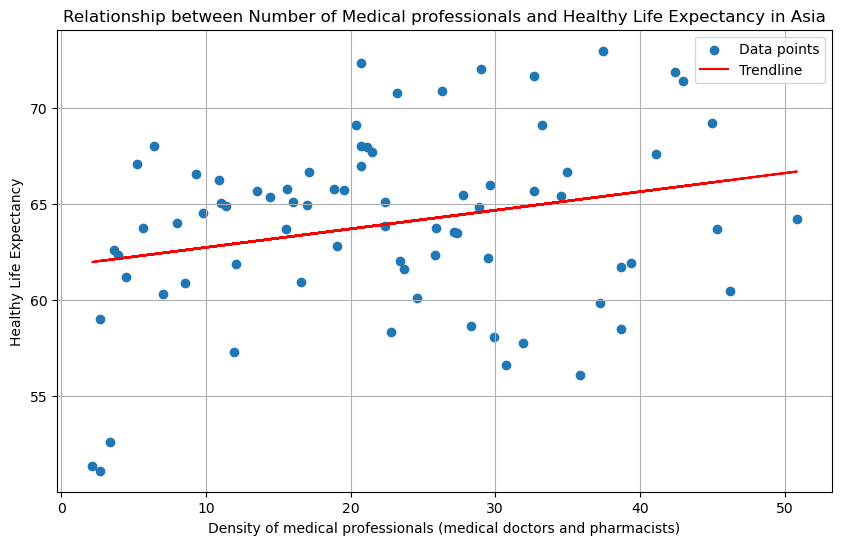

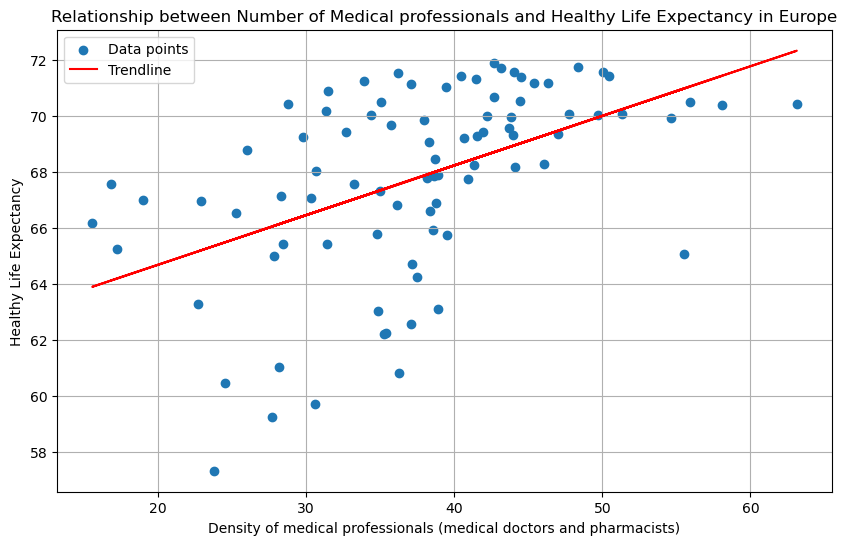

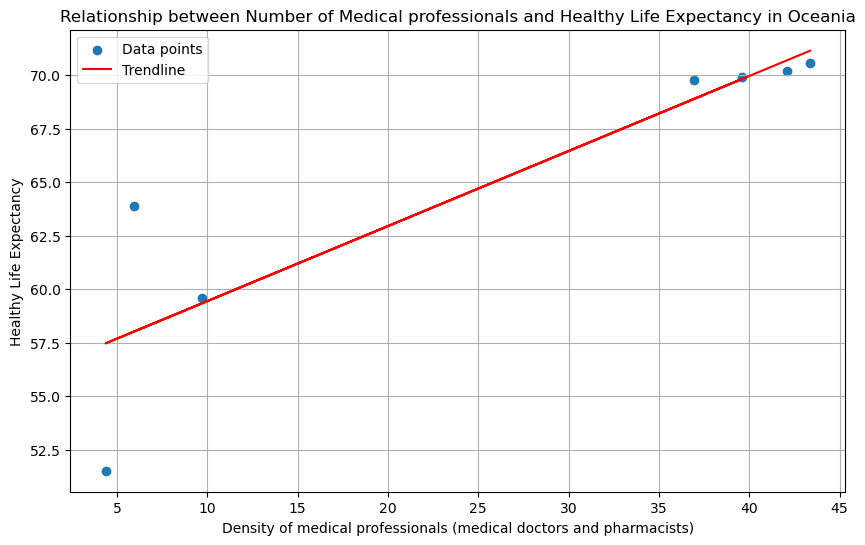

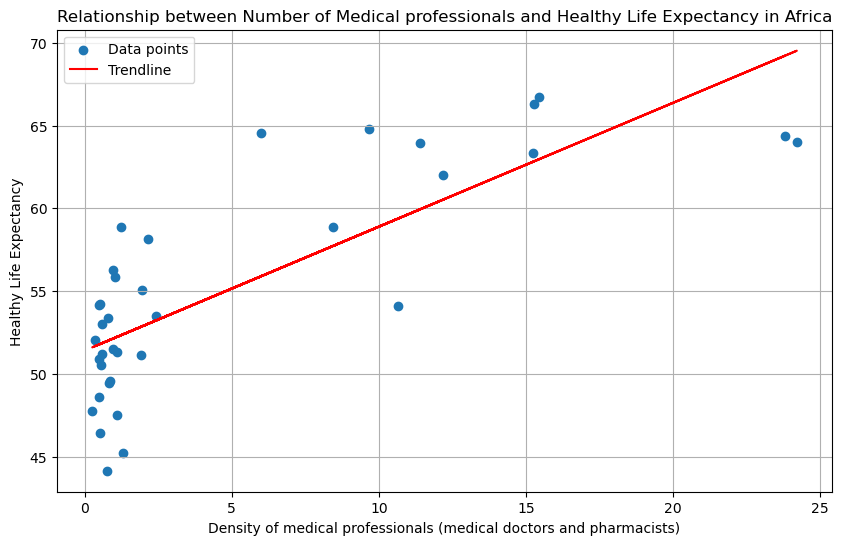

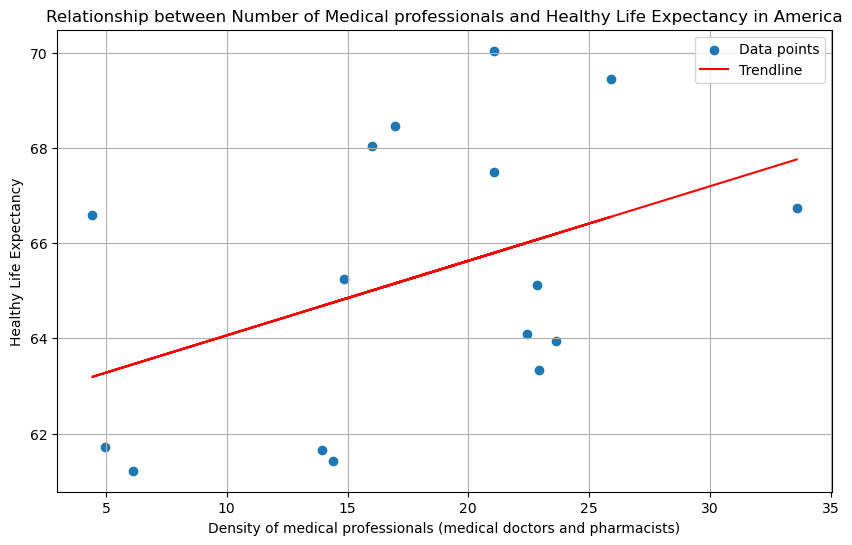

In [26]:
from sklearn.linear_model import LinearRegression

# Plotting the scatter plot between the number of Medical professionals and Healthy Life Expectancy in each continent 

def generate_scatter_plot(continent):
    
    # Filter data for 1 continent and use only "Both sexes" value:
    continent_data = medProf_lifeExp[(medProf_lifeExp['Continent'] == continent) & (medProf_lifeExp['Sex'] == 'Both sexes')]
    
    # Plotting:
    plt.figure(figsize=(10, 6))
    plt.scatter(continent_data['Total Density'], continent_data['Years'], label='Data points')
    plt.title(f'Relationship between Number of Medical professionals and Healthy Life Expectancy in {continent}')
    plt.xlabel('Density of medical professionals (medical doctors and pharmacists)')
    plt.ylabel('Healthy Life Expectancy')
    
    # Adding trendline
    X = continent_data['Total Density'].values.reshape(-1, 1)
    y = continent_data['Years'].values
    model = LinearRegression()
    model.fit(X, y)
    plt.plot(X, model.predict(X), color='red', label='Trendline')
    
    plt.grid(True)
    plt.legend()
    plt.show()

for continent in medProf_lifeExp['Continent'].unique():
    generate_scatter_plot(continent)


**<u>Why this chart?<u>:** We chose the scatterplot to visualize the relationship between the density of medical professionals (including medical doctors and pharmacists) and healthy life expectancy across different continents. 
- Each point on the scatterplot represents a country within a specific continent. By plotting these points, we can observe the general trend between the number of medical professionals and healthy life expectancy. 
- Additionally, a trendline is added to indicate the overall direction of the relationship, whether it's positive (increasing medical professional density corresponds to higher life expectancy), negative (decreasing life expectancy with higher medical professional density), or neutral (no clear relationship). This allows us to assess the correlation between these two variables and understand if there's any discernible pattern across continents.


**<u>Interpretation<u>:** While in Europe, we observe a somewhat clearer positive correlation between medical professional density and life expectancy, **the relationship between these factors appears nuanced across all continents.** Despite some countries exhibiting medium/high densities of medical professionals, their corresponding life expectancies may not necessarily reflect significant improvements. 
- This discrepancy suggests that while access to healthcare providers is undoubtedly crucial, other determinants such as healthcare infrastructure, socioeconomic factors, public health initiatives, and lifestyle choices may equally contribute to overall population health outcomes.
- This observation **underscores the multifaceted nature of life expectancy**, which can be influenced by a variety of factors. Although adequate healthcare access is crucial (here in this case, indicated by medical profesional densities), the quality of healthcare systems is also of great importance. 
- Moreover, several other factors can influence the life expectancy of populations, including nutrition and diet, lifestyle factors, and environmental conditions such as air and water quality. Socioeconomic factors like income, education, employment opportunities, and social support networks also play a significant role in determining life expectancy. Higher socioeconomic status is associated with better access to healthcare, healthier lifestyle choices, and improved living conditions, all of which contribute to increased longevity.